In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In  this  part  of  the  exercise,  you  will  build  a  logistic  regression  model  to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results  on  two  exams.   You  have  historical  data  from  previous  applicants
that you can use as a training set for logistic regression.  For each training
example, you have the applicant’s scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams

In [2]:
data=pd.read_csv("ex2data1.txt", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


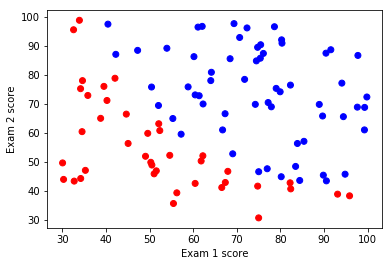

In [4]:
colors = ["red"if s==0 else "blue" for s in data[2]]
plt.scatter(x=data[0], y=data[1],c=colors, data=data)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

Sigmoid
Before you start with the actual cost function, recall that the logistic regres-
sion hypothesis is defined as:
h(x) = g(thetaTx)

In [5]:
x=np.array(data[[0,1]])
theta = np.zeros(3)
y = np.array(data[2])

x=np.insert(x, 0, 1, axis=1)

In [6]:
print (x.shape,y.shape,theta.shape)

(100, 3) (100,) (3,)


In [7]:
c = x@theta
d = np.asmatrix(x)*np.asmatrix(theta).T

print(c.reshape(-1,1).shape)
print(d.shape)

(100, 1)
(100, 1)


In [8]:

def sigmoid(z):
    
    return 1/(1+np.exp(-z))

def cost(theta,x,y):
    #theta = np.matrix(theta)
    #X = np.matrix(x)
    #y = np.matrix(y)
    z = x@theta
    prediction = sigmoid(z)
    J = np.sum(-y*np.log(prediction)-(1-y)*np.log(1-prediction))*1/len(y)
    return J
    
def gradient (theta,x,y):
    predictions = sigmoid(x@theta)
    grad = (x.T @ (predictions - y))/len(y) 
    return grad

In [9]:
initial_cost = cost(theta,x,y)
grad = gradient(theta,x,y)
theta0 = np.zeros(x.shape[1])
print("Cost using inital theta parameters",initial_cost)
print("Gradient",grad)

Cost using inital theta parameters 0.69314718056
Gradient [ -0.1        -12.00921659 -11.26284221]


In [10]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta0, fprime=gradient, args=(x, y)) 
result

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

In [11]:
print("Optimal theta parameters:",result[0])
print("Final cost:",cost(result[0],x,y))


Optimal theta parameters: [-25.1613186    0.20623159   0.20147149]
Final cost: 0.203497701589


In [12]:
def probability(x,theta):
    z = np.dot(x,theta)
    probab = sigmoid(z)
    
    return probab

def prediction(x,theta):
    
    
    return (probability(x,theta) >= 0.5).astype(int)

Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a
particular  student  will  be  admitted.   For  a  student  with  an  Exam  1  score
of  45  and  an  Exam  2  score  of  85,  you  should  expect  to  see  an  admission
probability of 0.776.

In [13]:
x_train = np.array([1,45,85])
probability(x_train,result[0])

0.7762906239711086

In [14]:
#Overall model score
total_predict = prediction(x,result[0])
print (y[y==total_predict].size/len(y))

0.89


In [15]:
def logisit_model(x_train,y_train,theta,max_iter):
    #theta = np.zeros(x_train.shape[1])
    #Theta = np.matrix(theta)
    #X = np.matrix(x_train)
    #y = np.matrix(y_train)
    for iteration in range(max_iter):
        theta = gradient(theta,x_train,y_train)
    print (cost(theta,x_train,y_train))
    return theta

# Regularized Linear Regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests.  From these two tests,
you would like to determine whether the microchips should be accepted or
rejected.  To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [16]:
data2 = pd.read_csv("ex2data2.txt", header = None)
data2.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


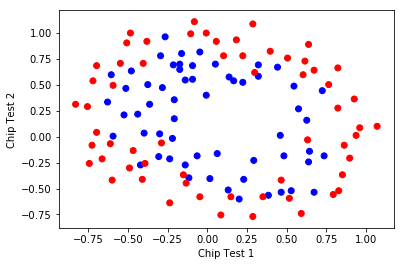

In [17]:
colors = ["red"if s==0 else "blue" for s in data2[2]]
plt.scatter(x=data2[0], y=data2[1],c=colors, data=data)
plt.xlabel("Chip Test 1")
plt.ylabel("Chip Test 2")
plt.show()

In [18]:
X=np.array(data2[[0,1]])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
mapped = poly.fit_transform(X)

In [21]:
mapped.shape

(118, 28)

In [22]:
theta2 = np.zeros(mapped.shape[1])
y2 = np.array(data2[2])


In [25]:
def regCost(theta,x,y,lmbd):
    
    #X = np.matrix(x)
    #y = np.matrix(y)
    
    RegCost=cost(theta,x,y) + (lmbd/(2*(len(y))))*(np.sum(np.square(theta)))
    return RegCost

def regGradient(theta,x,y,lmbd):
    for i in range(x.shape[1]):
        if i ==0:
            regG = gradient (theta,x,y)
        else:
            regG = gradient (theta,x,y) + (lmbd/len(y))*theta
    return regG

In [26]:
regCost(theta2,mapped,y2,1)
regGradient(theta2,mapped,y2,1)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [27]:
result_2 = opt.fmin_tnc(func=regCost, x0=theta2, fprime=regGradient, args=(mapped, y2,1)) 
#result_2

In [28]:
total_predict2 = prediction(mapped,result_2[0])
print (y2[y2==total_predict2].size/len(y2))


0.8135593220338984


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [44]:
lr_model = LogisticRegression()
lr_model.fit(mapped,y2)
lr_model.predict(mapped)

In [58]:
print("Model Score:",round((lr_model.score(mapped,y2)*100),2))

Model Score: 83.05
